<a href="https://colab.research.google.com/github/IshratJahan1623/Intro-to-Machine-Learning/blob/main/Homework_1/1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


X =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
The cost for given values of theta_0 and theta_1 = 5.524438459196242
Final value of theta = [ 5.92654501 -2.03779022]
cost_history = [5.42181288 5.33519028 5.2601802  ... 0.98499334 0.98499334 0.98499333]
Final cost = 0.9849933339930752


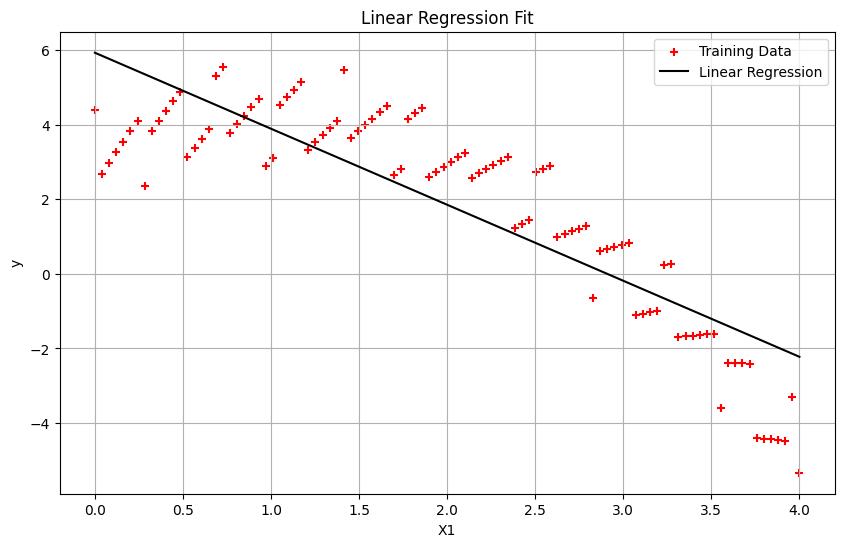

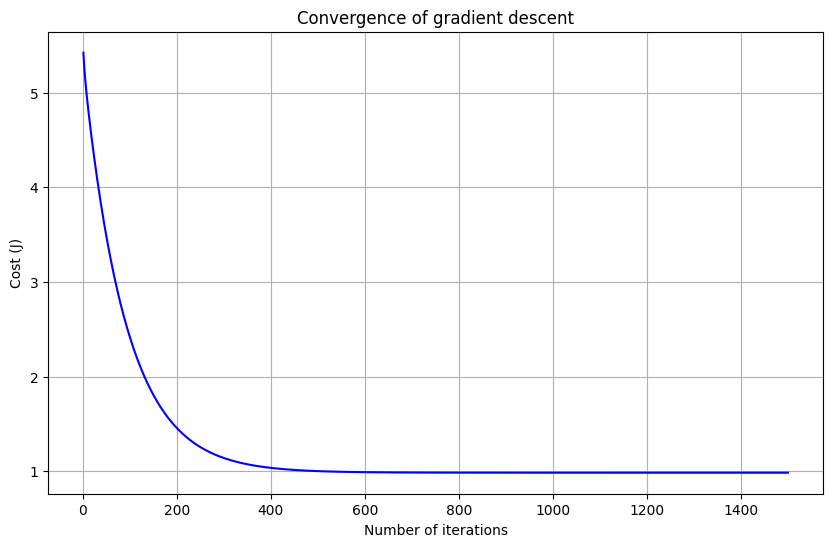

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset D3 from the github link
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())

from IPython.display import display
display(df)

def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """
    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Separate features and labels
X = df.values[:, 0]   # get input values from the first column -- X is the feature here
y = df.values[:, 3]   # get output values from the fourth column -- Y is the target here
m = len(y)            # Number of training examples
n = len(X)            # Number of training examples

# Display first 5 records and the total number of training examples
print('X = ', X[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

# Build design matrix
X_0 = np.ones((m, 1))
X_1 = X.reshape(m, 1)
X = np.hstack((X_0, X_1))
X[:5]

# Initialize theta and hyperparameters
theta = [0., 0.]
iterations = 1500
alpha = 0.025

# Compute initial cost
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

# Run gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)
print('Final cost =', cost_history[-1])

# Plot training data and fitted line
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')
plt.plot(X[:, 1], X.dot(theta), color='black', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

# Convergence plot
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()
